In [1]:
from sys import path_hooks

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2

In [4]:
path_hooks = []

path = path_hooks[0]

In [51]:
def remove_inactive_borders(image, threshold=0):
    """Remove black borders from image edges."""
    # Find rows and columns with active pixels
    row_mask = np.any(image > threshold, axis=1)
    col_mask = np.any(image > threshold, axis=0)

    # Get indices of first and last active rows/columns
    active_rows = np.where(row_mask)[0]
    active_cols = np.where(col_mask)[0]

    if len(active_rows) == 0 or len(active_cols) == 0:
        return image  # No active pixels found

    return image[active_rows[0]:active_rows[-1]+1,
                 active_cols[0]:active_cols[-1]+1]

In [46]:
# Read raw image
def read_raw_image(file_path, width, height):
    with open(file_path, 'rb') as f:
        raw_data = np.fromfile(f, dtype=np.uint8)
    image = raw_data.reshape((height, width))
    return image

In [23]:
# auto detect image size
def auto_detect_image_size(file_path):
    with open(file_path, 'rb') as f:
        raw_data = np.fromfile(f, dtype=np.uint8)
    total_pixels = raw_data.size

    # Common image sizes to check against
    common_sizes = [
        (512, 512),
        (1024, 1024),
        (2048, 2048),
        (4096, 4096),
        (1920, 1080),
        (1280, 720),
        (640, 480),
        (640, 640)
    ]

    for width, height in common_sizes:
        if width * height == total_pixels:
            return width, height

    raise ValueError("Could not auto-detect image size. Please provide width and height.")



In [24]:
# Display image
def display_image(image, title='Image'):
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()



In [25]:
# detact size
width, height = auto_detect_image_size(path)
print(f"Detected image size: {width}x{height}")

ValueError: Could not auto-detect image size. Please provide width and height.

In [27]:
#open the image
image = read_raw_image(path, width, height)
display_image(image, title='Raw Image')

ValueError: cannot reshape array of size 614400 into shape (640,640)

In [31]:
raw_data = np.fromfile(path, dtype=np.uint16)
plt.imshow(raw_data.reshape((height, width)), cmap='gray')

ValueError: cannot reshape array of size 614400 into shape (640,640)

In [47]:
# detect posible width adn hight by input a size
def detect_image_size_by_input(file_path, input_size):
    with open(file_path, 'rb') as f:
        raw_data = np.fromfile(f, dtype=np.uint8)
    total_pixels = raw_data.size

    if total_pixels % input_size != 0:
        raise ValueError("Input size does not divide total pixels evenly.")

    height = total_pixels // input_size
    return input_size, height



In [48]:
detect_image_size_by_input(path, 640)

(640, 1920)

In [52]:
image = read_raw_image(path, 640, 1920)
# display_image(image, title='Raw Image with 640 width')

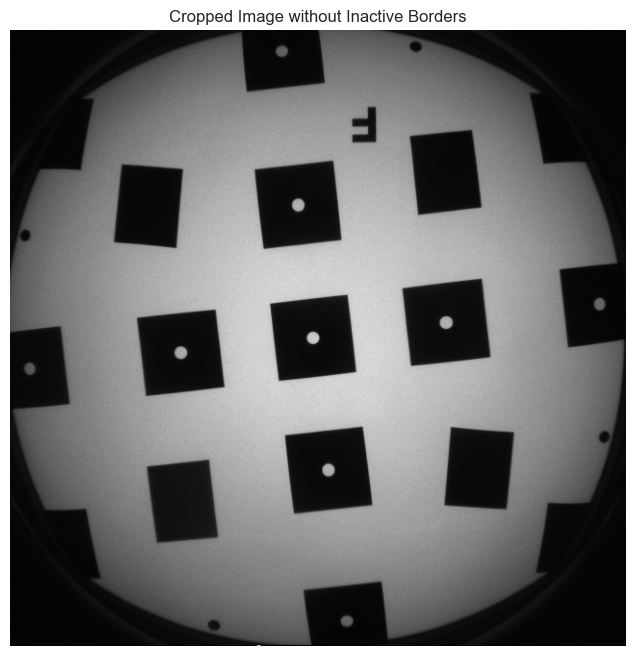

In [53]:
# remove inactive borders
cropped_image = remove_inactive_borders(image, threshold=0)
display_image(cropped_image, title='Cropped Image without Inactive Borders')